In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [157]:
df = pd.read_csv("online_retail.csv")

In [158]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [159]:
df.shape

(541909, 8)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning

In [161]:
# Finding and Removing Nulls
100*(df.isnull().sum())/len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [162]:
df.dropna(inplace=True)

In [163]:
df.isnull().sum()



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [164]:
df.shape

(406829, 8)

In [165]:
# changing Customer_Id dtype
df['CustomerID'] = df['CustomerID'].astype(str)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [167]:
# Adding new column "Amount"

df['Amount'] = df['Quantity'] * df['UnitPrice']

In [168]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [169]:
df_A = df.groupby('CustomerID')['Amount'].sum()
df_A = df_A.reset_index()
df_A.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [170]:
#  Frequency

df_f = df.groupby('CustomerID')['InvoiceNo'].count()
df_f = df_f.reset_index()
df_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [171]:
# Merging these two dfs

new_df = pd.merge(df_A, df_f , on='CustomerID', how='inner')
new_df.head(3)

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31


In [172]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [173]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [174]:
df['date_difference'] = max_date - df['InvoiceDate']

In [175]:
print(df['date_difference'].head())

0   373 days 04:24:00
1   373 days 04:24:00
2   373 days 04:24:00
3   373 days 04:24:00
4   373 days 04:24:00
Name: date_difference, dtype: timedelta64[ns]


In [176]:
#  recency of customer

df_r = df.groupby('CustomerID')['date_difference'].min().reset_index()
df_r.head()

,CustomerID,date_difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [177]:
# extract number of days only

# Convert timedelta to days
df_r['date_difference'] = df_r['date_difference'].apply(lambda x: x.days)
print(df_r.head())

  CustomerID  date_difference
0    12346.0              325
1    12347.0                1
2    12348.0               74
3    12349.0               18
4    12350.0              309


In [178]:
new_df.columns

Index(['CustomerID', 'Amount', 'InvoiceNo'], dtype='object')

In [179]:
# # Select only the necessary columns and rename
# new_df = new_df[['CustomerID', 'Amount', 'InvoiceNo', 'date_difference_y']]



In [180]:
new_df = pd.merge(new_df, df_r, on='CustomerID', how='inner')
new_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
new_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0, 0.5, 'Values')

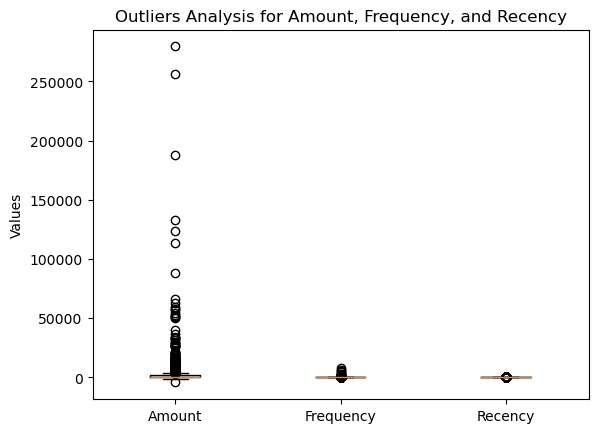

In [183]:
# outliers analysis for Amount, Frequency anf Recency
columns = ['Amount','Frequency','Recency']
figsize = [8,8]
plt.boxplot(x=new_df[columns], labels=columns)

plt.title('Outliers Analysis for Amount, Frequency, and Recency')
plt.ylabel('Values')


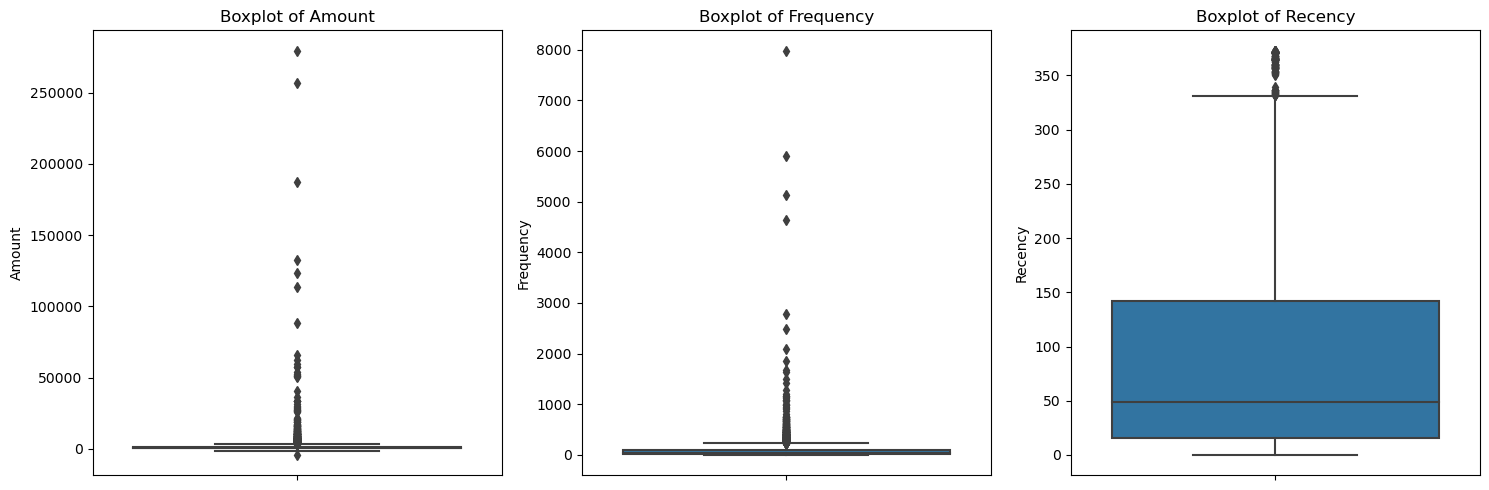

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size
plt.figure(figsize=(15, 5))

# Creating subplots for each boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=new_df['Amount'])
plt.title('Boxplot of Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=new_df['Frequency'])
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=new_df['Recency'])
plt.title('Boxplot of Recency')

# Display the plots
plt.tight_layout()
plt.show()


In [185]:
# Removing outliers

df_no_outliers = new_df.copy()

for col in columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers =  df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

In [186]:
# Display the cleaned dataset
print("Original shape:", new_df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Original shape: (4372, 4)
Shape after removing outliers: (3697, 4)


# Scaling

In [187]:
scaler = StandardScaler()

In [188]:
df_no_outliers.head(3)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18


In [190]:
df_no_outliers_subset = df_no_outliers[['Amount', 'Frequency', 'Recency']]
reformed_df = scaler.fit_transform(df_no_outliers_subset)

In [191]:
reformed_df.shape

# here it is already converted in numpy array

(3697, 3)

In [193]:
# reformed_df.head(3)

In [194]:
# convert it back to DataFrame

reformed_df = pd.DataFrame(reformed_df, columns=df_no_outliers_subset.columns)

In [196]:
reformed_df.shape

(3697, 3)

In [197]:
reformed_df.head(3)

,Amount,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629


# Model Building

In [209]:
inertia=[]

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters = n_clusters, random_state=42, n_init=10)
    kmeans.fit(reformed_df)
    inertia.append(kmeans.inertia_) # Append inertia (sum of squared distances)

## Elbow curve to get the right number of clusters

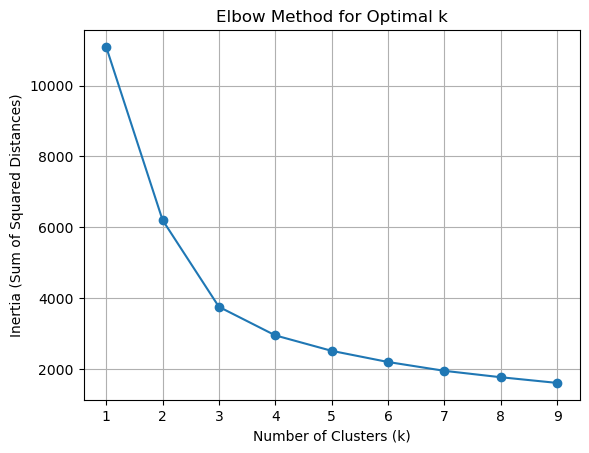

In [211]:
figsize = [10,15]
plt.plot(range(1,10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
# plt.xticks(range(1, 11))  # Set x-ticks to the range of clusters
plt.grid()
plt.show()

In [212]:
# Final Model

kmeans = KMeans(n_clusters = 3, random_state = 42, n_init=10)
kmeans.fit(reformed_df)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [217]:
# Add the cluster labels to your DataFrame
reformed_df['Cluster'] = kmeans.labels_

# Display the first few rows of the updated DataFrame
print(reformed_df.head())

     Amount  Frequency   Recency  Cluster
0 -1.041614  -1.070949  2.136422        1
1  1.385298  -0.375498 -0.282050        2
2  1.331702   0.631707 -0.821629        0
3 -0.590055  -0.711233  1.982257        1
4  1.045238   1.159290 -0.657828        0


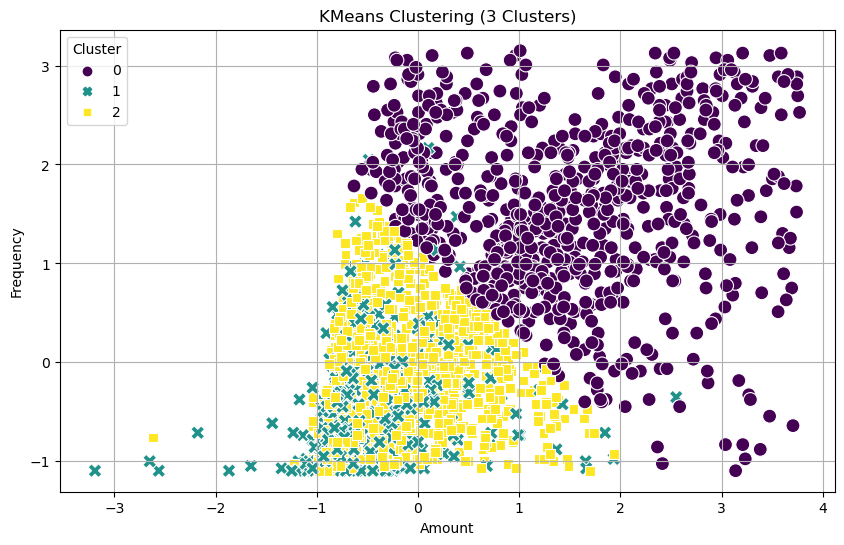

In [218]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reformed_df, x='Amount', y='Frequency', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('KMeans Clustering (3 Clusters)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_7376\3240139409.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_no_outliers, x='Cluster', y='Amount', jitter=True, palette='viridis', alpha=0.7)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `n

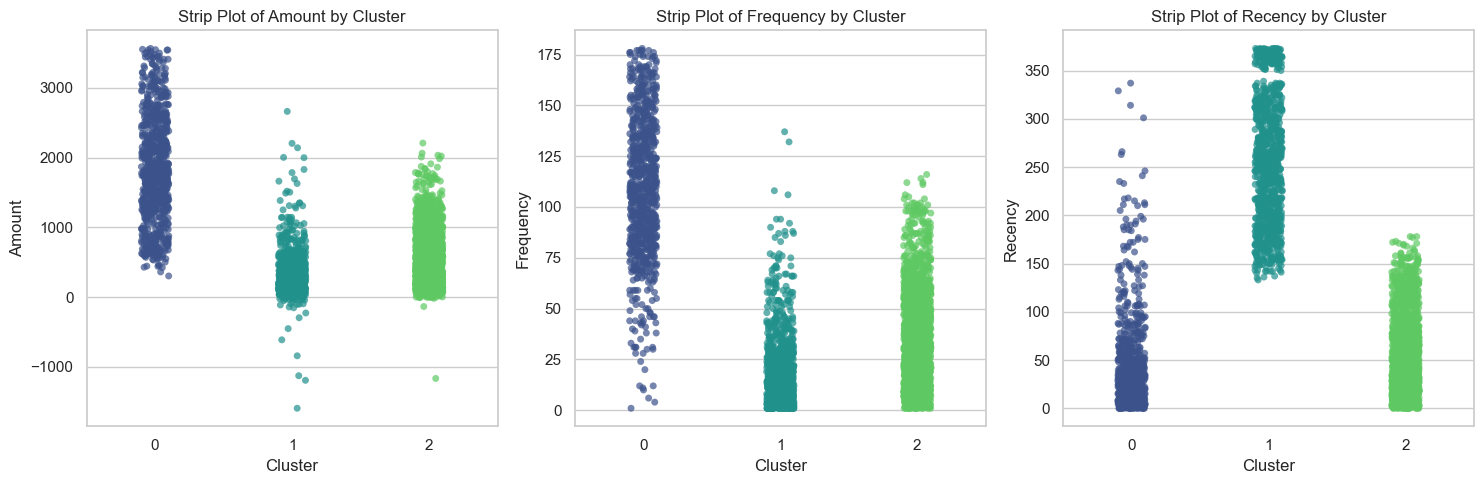

In [219]:
# Strip plot 

# Set the style for the plots
sns.set(style="whitegrid")

# Set up the figure size
plt.figure(figsize=(15, 5))

# Strip plot for Amount
plt.subplot(1, 3, 1)
sns.stripplot(data=df_no_outliers, x='Cluster', y='Amount', jitter=True, palette='viridis', alpha=0.7)
plt.title('Strip Plot of Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount')

# Strip plot for Frequency
plt.subplot(1, 3, 2)
sns.stripplot(data=df_no_outliers, x='Cluster', y='Frequency', jitter=True, palette='viridis', alpha=0.7)
plt.title('Strip Plot of Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Strip plot for Recency
plt.subplot(1, 3, 3)
sns.stripplot(data=df_no_outliers, x='Cluster', y='Recency', jitter=True, palette='viridis', alpha=0.7)
plt.title('Strip Plot of Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Adjust the layout
plt.tight_layout()
plt.show()


In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load Dataset with user input for file path
def load_data():
    file_path = input("Please enter the file path for the dataset (CSV format): ")
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print("File not found. Please check the path and try again.")
        return None
    
    
# Data Cleaning
def clean_data(df):
    df.dropna(inplace=True)  # Drop missing values
    df['CustomerID'] = df['CustomerID'].astype(str)  # Ensure 'CustomerID' is a string
    df['Amount'] = df['Quantity'] * df['UnitPrice']  # Calculate 'Amount' column
    return df

# Feature Engineering
def engineer_features(df):
    # Calculate Amount per Customer
    df_A = df.groupby('CustomerID')['Amount'].sum().reset_index()
    # Calculate Frequency per Customer
    df_F = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
    # Calculate Recency per Customer
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    max_date = df['InvoiceDate'].max()
    df['Recency'] = (max_date - df['InvoiceDate']).dt.days
    df_R = df.groupby('CustomerID')['Recency'].min().reset_index()

    # Merge into a single DataFrame
    df_features = pd.merge(pd.merge(df_A, df_F, on='CustomerID'), df_R, on='CustomerID')
    df_features.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
    return df_features

# Outlier Removal
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Scaling
def scale_data(df, columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns])
    scaled_df = pd.DataFrame(scaled_data, columns=columns)
    joblib.dump(scaler, 'scaler.pkl')  # Save scaler for reuse
    return scaled_df

# Model Training and Inertia Plot
def train_kmeans(scaled_df, max_k=10):
    inertia = []
    for n_clusters in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(scaled_df)
        inertia.append(kmeans.inertia_)
    
    # Elbow plot
#     plt.plot(range(1, max_k + 1), inertia, marker='o')
#     plt.title('Elbow Method for Optimal k')
#     plt.xlabel('Number of Clusters (k)')
#     plt.ylabel('Inertia (Sum of Squared Distances)')
#     plt.axvline(x=3, color='red', linestyle='--', label='Optimal k=3')
#     plt.legend()
#     plt.grid()
#     plt.show()

    # Train final KMeans with optimal clusters (3 in this case)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    joblib.dump(kmeans, 'kmeans_model.pkl')  # Save model for reuse
    scaled_df['Cluster'] = kmeans.labels_
    return scaled_df

# Visualize Clusters
# def visualize_clusters(df, cluster_df, x_col='Amount', y_col='Frequency'):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=cluster_df, x=x_col, y=y_col, hue='Cluster', palette='viridis', style='Cluster', s=100)
#     plt.title(f'KMeans Clustering on {x_col} and {y_col}')
#     plt.xlabel(x_col)
#     plt.ylabel(y_col)
#     plt.legend(title='Cluster', loc='best')
#     plt.grid()
#     plt.show()

# Strip Plot for Cluster Distributions
def strip_plot(cluster_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    features = ['Amount', 'Frequency', 'Recency']
    
    for i, feature in enumerate(features):
        sns.stripplot(data=cluster_df, x='Cluster', y=feature, palette='viridis', ax=axes[i], jitter=0.3)
        axes[i].set_title(f'Strip Plot of {feature} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(feature)
        axes[i].grid(True)
        
    plt.tight_layout()
    plt.show()

# Predict Clusters for New Data
def predict_clusters(new_data):
    # Load saved scaler and KMeans model
    scaler = joblib.load('scaler.pkl')
    kmeans = joblib.load('kmeans_model.pkl')

    # Scale new data
    new_data_scaled = scaler.transform(new_data[['Amount', 'Frequency', 'Recency']])
    new_data['Cluster'] = kmeans.predict(new_data_scaled)
    return new_data



Please enter the file path for the dataset (CSV format): online_retail.csv
Dataset loaded successfully!


C:\Users\PC\AppData\Local\Temp\ipykernel_7376\3067945774.py:107: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cluster_df, x='Cluster', y=feature, palette='viridis', ax=axes[i], jitter=0.3)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name`

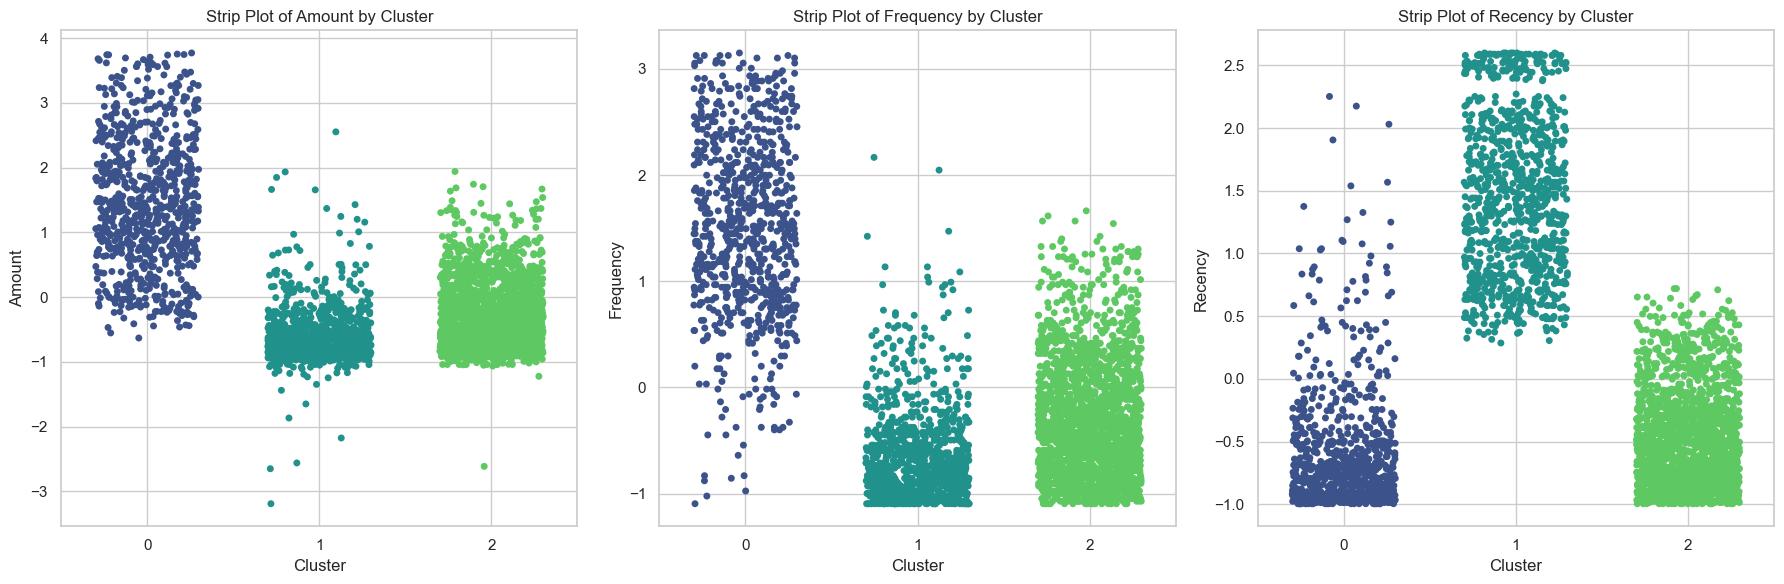

In [237]:
# Main workflow
if __name__ == "__main__":
    # Replace with the path to your dataset
    df = load_data()
    
    # Data Cleaning and Feature Engineering
    df = clean_data(df)
    df_features = engineer_features(df)
    
    # Outlier Removal
    df_no_outliers = remove_outliers(df_features, ['Amount', 'Frequency', 'Recency'])
    
    # Scaling and Model Training
    scaled_df = scale_data(df_no_outliers, ['Amount', 'Frequency', 'Recency'])
    cluster_df = train_kmeans(scaled_df)
    
    # Visualization
#     visualize_clusters(df_no_outliers, cluster_df)
    strip_plot(cluster_df)  # New strip plot visualization

   